In [95]:
using EAMC
using SparseArrays, LinearAlgebra
using Plots

In [184]:
using SparseArrays
Q=sprand(30,30, .2)

Q=Q-Diagonal(Q)
Q=Q-Diagonal(sum(Q, dims=2)|>vec)

30×30 SparseMatrixCSC{Float64,Int64} with 204 stored entries:
  [1 ,  1]  =  -1.03705
  [9 ,  1]  =  0.317066
  [10,  1]  =  0.0924728
  [15,  1]  =  0.0152373
  [17,  1]  =  0.829159
  [19,  1]  =  0.211614
  [24,  1]  =  0.531516
  [2 ,  2]  =  -0.724141
  [7 ,  2]  =  0.938966
  [19,  2]  =  0.850515
  [23,  2]  =  0.530785
  [25,  2]  =  0.494363
  ⋮
  [29, 29]  =  -2.05875
  [1 , 30]  =  0.0692884
  [2 , 30]  =  0.669751
  [6 , 30]  =  0.980715
  [8 , 30]  =  0.621316
  [14, 30]  =  0.778416
  [17, 30]  =  0.0101624
  [19, 30]  =  0.180352
  [21, 30]  =  0.498247
  [22, 30]  =  0.867173
  [23, 30]  =  0.813437
  [27, 30]  =  0.180165
  [30, 30]  =  -2.89188

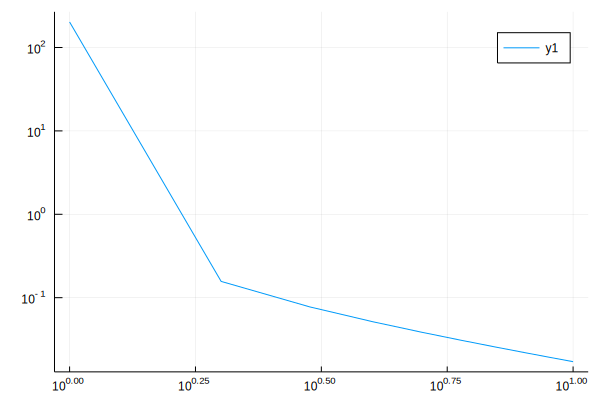

In [185]:
T = 1
n = size(Q, 1)

errors = map(1:100:1000) do nt
    
    g = galerkin([Q for i=1:nt], [T/nt for i=1:nt])
    global approx = EAMC.commitors(g, n)[1:n,1:n] 
    global truth =  exp(T*Q|>collect)
    norm(filter(!isnan,approx ./ truth .- 1))
end
plot(errors, axis=:log)